# Apple Classifier
This apple classifier uses opencv and transfer learning to classify between all the 15 categories of apple including the rotten apples found in the market. The dataset has been take from kaggle

In [1]:
train_path = '/content/drive/MyDrive/apple_dataset/Training'
test_path = '/content/drive/MyDrive/apple_dataset/Test'

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
pip install keras

In [4]:
import datetime
import numpy as np
import cv2
import keras
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.optimizers import SGD
from scipy.interpolate import make_interp_spline
import pandas as pd
import matplotlib.pyplot as plt
import glob as glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [5]:
print(keras.__version__)
print(tf.__version__)

2.6.0
2.6.0


## Data Preproscessing

In [6]:
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

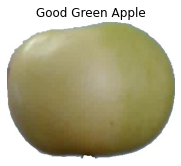

In [7]:
img = load_img('/content/drive/MyDrive/apple_dataset/Training/apple_6/r0_0.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Good Green Apple')
plt.show()


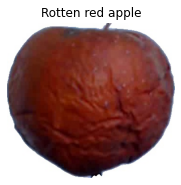

In [8]:
img = load_img('/content/drive/MyDrive/apple_dataset/Training/apple_rotten_1/r0_0.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Rotten red apple')
plt.show()


In [9]:
x = img_to_array(img)
x2 = x.reshape((1,) + x.shape)
x2.shape

(1, 318, 343, 3)

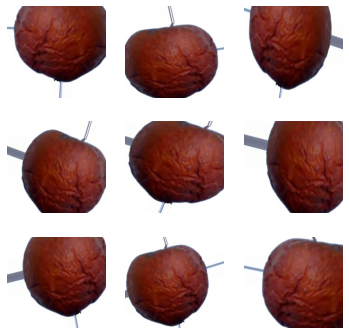

In [10]:
i = 0
fig = plt.figure(figsize = (6,6))
plt.title('Pre-processed')
for batch in datagen.flow(x2, batch_size = 1):
    i += 1
    if i > 9:
        break
    temp = batch.reshape(x.shape)
    plt.subplot(3, 3, i)
    plt.imshow(temp.astype('uint8'))
    plt.axis('off')
plt.show()

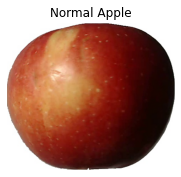

In [11]:
img = load_img('/content/drive/MyDrive/apple_dataset/Training/apple_braeburn_1/r0_0.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Normal Apple')
plt.show()

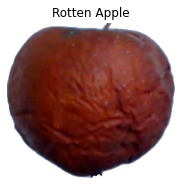

(343, 318)

In [12]:
img = load_img('/content/drive/MyDrive/apple_dataset/Training/apple_rotten_1/r0_0.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Rotten Apple')
plt.show()
img.size

## Default settings for training

In [13]:
img_width, img_height = 224, 224
train_dir = train_path
test_dir = test_path
nb_epochs = 5
batch_size = 32
nb_classes = len(glob.glob(train_dir + '/*'))

In [14]:
import os

In [15]:
# get number of images in training directory
nb_train_samples = 0
for r, dirs, files in os.walk(train_dir):
    for dr in dirs:
        nb_train_samples += len(glob.glob(os.path.join(r, dr + "/*")))
print(nb_train_samples)

4821


In [16]:
# get number of images in test directory
nb_test_samples = 0
for r, dirs, files in os.walk(test_dir):
    for dr in dirs:
        nb_test_samples += len(glob.glob(os.path.join(r, dr + "/*")))
print(nb_test_samples)

2417


## Data preprocessing for training phase

In [17]:
train_datagen =  ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    horizontal_flip = True)

## Data preprocessing for test phase

In [18]:
test_datagen =  ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    horizontal_flip = True)

In [19]:
# generate and store training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size)

Found 4821 images belonging to 15 classes.


In [20]:
# generate and store validation data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size)

Found 2417 images belonging to 15 classes.


## Set up transfer learning on pre-trained ImageNet MobileNet model - remove fully connected layer and replace with softmax for classifying 3 classes

In [21]:
MobileNet_model = tf.keras.applications.MobileNet(input_shape=(224,224,3),weights = 'imagenet', include_top = False)

17235968/17225924 [==============================] - 0s 0us/step


In [22]:
MobileNet_model.trainable = False

In [23]:
model = tf.keras.Sequential([
                          MobileNet_model,
                          keras.layers.GlobalAveragePooling2D(),
                          keras.layers.Dense(15, activation='Softmax')])

In [24]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
EPOCHS = 10
BATCH_SIZE = 32
STEPS_PER_EPOCH = 10
VALIDATION_STEPS = 10
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=int(4821/BATCH_SIZE),
    validation_data=test_generator,
    validation_steps=int(2417/BATCH_SIZE))

Epoch 1/10
150/150 [==============================] - 1610s 11s/step - loss: 0.9051 - accuracy: 0.7874 - val_loss: 0.3073 - val_accuracy: 0.9304
Epoch 2/10
150/150 [==============================] - 123s 821ms/step - loss: 0.1901 - accuracy: 0.9706 - val_loss: 0.1203 - val_accuracy: 0.9833
Epoch 3/10
150/150 [==============================] - 120s 804ms/step - loss: 0.0893 - accuracy: 0.9871 - val_loss: 0.0668 - val_accuracy: 0.9917
Epoch 4/10
150/150 [==============================] - 115s 768ms/step - loss: 0.0551 - accuracy: 0.9931 - val_loss: 0.0438 - val_accuracy: 0.9929
Epoch 5/10
150/150 [==============================] - 119s 795ms/step - loss: 0.0373 - accuracy: 0.9954 - val_loss: 0.0291 - val_accuracy: 0.9962
Epoch 6/10
150/150 [==============================] - 120s 799ms/step - loss: 0.0306 - accuracy: 0.9962 - val_loss: 0.0319 - val_accuracy: 0.9937
Epoch 7/10
150/150 [==============================] - 117s 782ms/step - loss: 0.0199 - accuracy: 0.9985 - val_loss: 0.0234 - 

Text(0.5, 1.0, 'Training and Validation Accuracy')

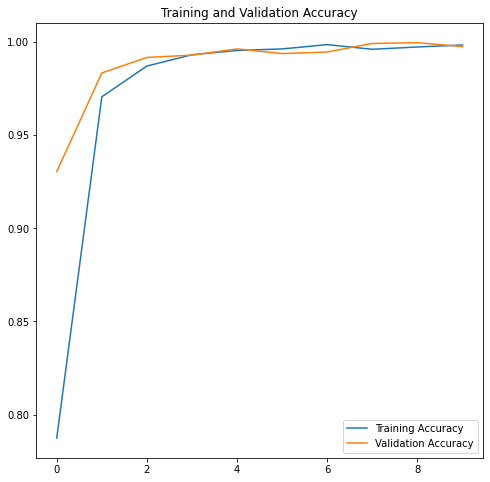

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')



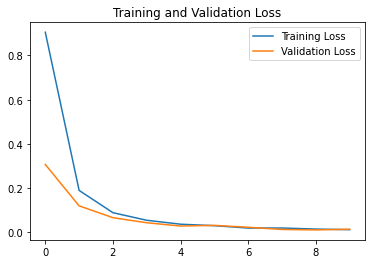

In [27]:
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()